In [3]:
from functools import partial
import numpy as np

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
n = np.array([1,2,3,5,10, 100, 200])

In [40]:
N = 1000

In [41]:
bins = 101

In [42]:
exp_mean = 3

In [43]:
a = 0.7
b = 0.5

In [44]:
dist = [partial(np.random.random), partial(np.random.exponential, exp_mean), partial(np.random.beta,a, b)]

In [45]:
title_1 = ["Flat",
       "Exponential (mean=%.1f)" % exp_mean,
       "Beta (A=%.1f, b=%1.f)" % (a,b)]

In [46]:
range_1 = np.array([[0,1], [0, 10], [0,1]])
means = np.array([0.5, exp_mean, a/(a+b)])
var = np.array([1/12, exp_mean**2, a*b/((a+b+1)*(a+b)**2)])

In [47]:
binrange = np.array([np.linspace(p,1, bins) for p,q in range_1])
ln,ld = len(n), len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

<Figure size 1300x1500 with 0 Axes>

<Figure size 1300x1500 with 0 Axes>

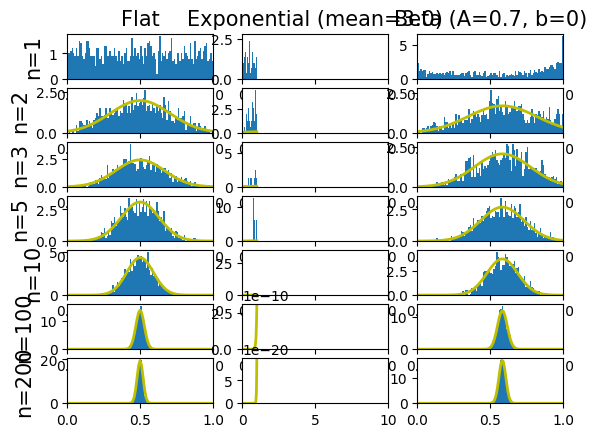

In [53]:
for i in range(ln):
    for j in range(ld):
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j],density=True)
        plt.xlim(range_1[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_1[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'y',linewidth=2)     
plt.show()

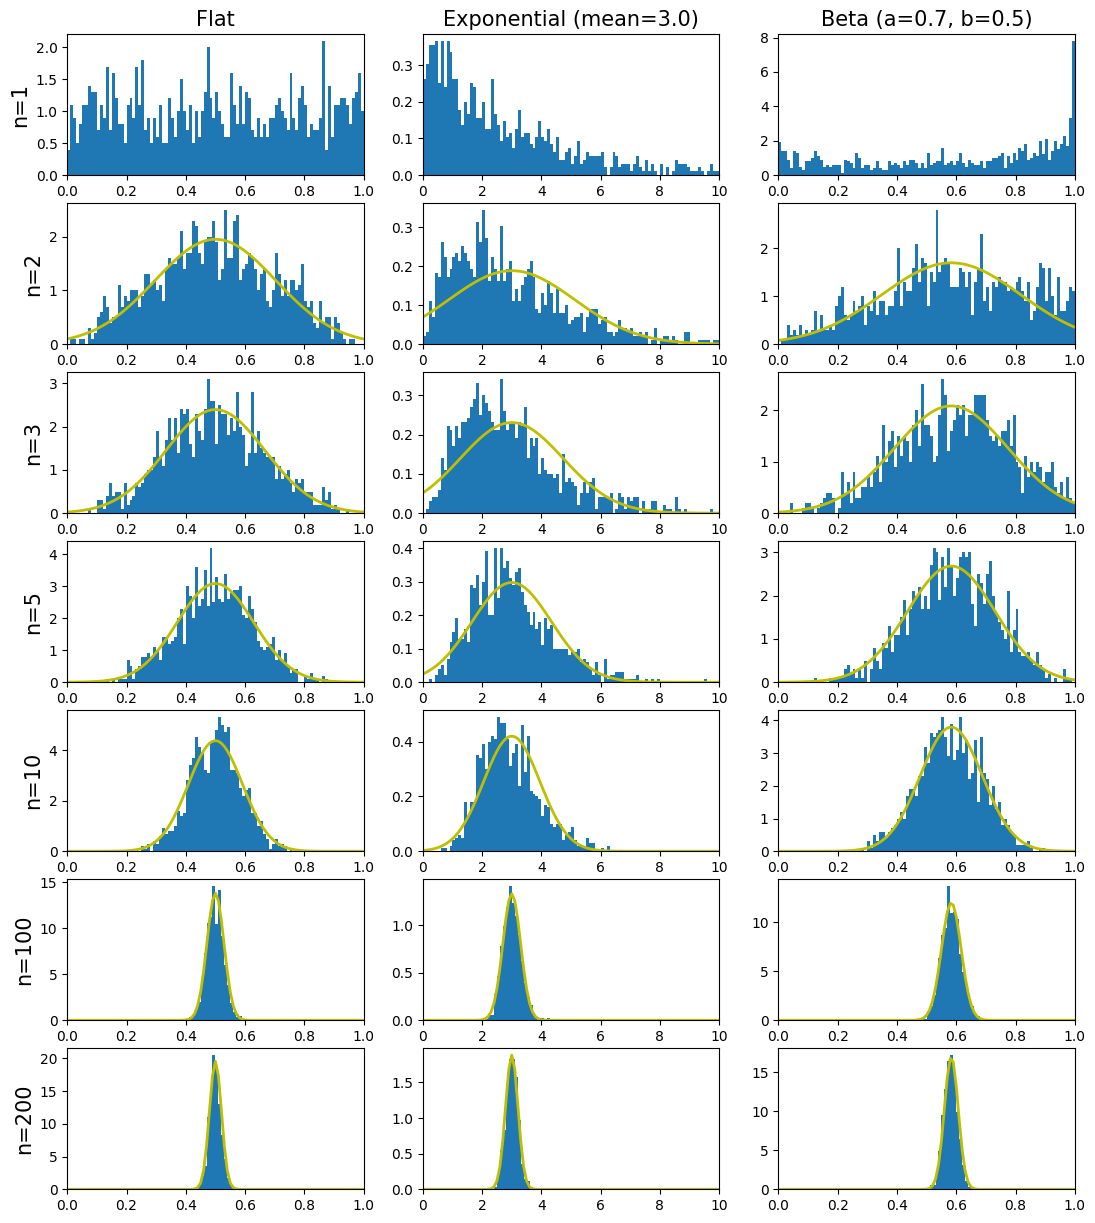

In [57]:
n=np.array([1, 2, 3, 5, 10, 100, 200])
N = 1000
bins=101
exp_mean=3

a,b=0.7,0.5 

dist=[partial(np.random.random), 
      partial(np.random.exponential, exp_mean),
      partial(np.random.beta, a, b)]

title_1=["Flat",
             "Exponential (mean=%.1f)" % exp_mean, 
             "Beta (a=%.1f, b=%.1f)" % (a,b)]
drange=np.array([[0,1],[0,10],[0,1]]) 
means=np.array([0.5,exp_mean,a/(a+b)])
var=np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a+b)**2)]) 
binrange=np.array([np.linspace(p,q,bins) for p,q in drange]) 
ln,ld=len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))
for i in range(ln):
    for j in range(ld):
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j],density=True)
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_1[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'y',linewidth=2)     
plt.show()